# Introduction

Chemical bonding theory is based largely on the position and locations of electrons. This is complicated by the fact that an electron doesn't follow a determined path or motion, but is instead governed by quantum laws and thus its position is random following a probabilistic distribution. This <em><b>wavefunction</b></em> encapsulates all about an electron's position, energy, and various other attributes, irrelevant to this module. However, there is often confusion about how best to demonstrate the likely position of electrons. This is difficult in part because an electron's position is given by a probability density function in three dimensions, making a 4-D plot is confusing, hard to depict accurately, and misses the point. 

If $\Psi(r,\theta,\phi)$ is the wavefunction then the probability of a molecule existing in the range given by $r_1<r<r_2$, $\theta_1<\theta<\theta_2$, $\phi_1<\phi<\phi_2$ is given by integrating the density function (the wavefunction times its complex conjugate) over the given bounds: 

$$P = \int \Psi^*\cdot \Psi dV = \int_{\phi_1}^{\phi_2}\int_{\theta_1}^{\theta_2}\int_{r_1}^{r_2}\Psi^*\cdot\Psi\cdot r^2\sin\theta drd\theta d\phi$$

In order to familiarize students with the shape of atomic <b><em>orbitals</em></b>, regions of electron density, often times chemistry textbooks tend to take a certain P value (say 95%), and solve the inverse integral.... i.e. show a surface inside of which there is a 95% probability of finding an electron. While this is a great tool to show the shape of a given orbital, it fails in two ways. The first is that it is way too complicated to do with complex molecular orbitals, some of which span multiple centers, and have complicated expressions that can't be easily plotted. The second is that key elements such as the polarity of the wavefunction (+/-) which are extremely important in bonding, can't be seen in these representations. 

## Monte Carlo to represent an Orbital

To this regard we can use Monte Carlo methods to represent an orbital. If we know the wavefunction as a function of 3 coordinates, we can sample a bunch of random points in a 3D box, and only keep the points for which the wavefunction has a significant value (significance level being passed as a parameter). Fortunately, calculating the wavefunction is relatively simple. Any of the allowed orbitals can be described by three quantum numbers (n,l,m), which are derived by boundary conditions from thinking of the nucleus-electron bond as both a rigid rotor (think two balls on the ends of a rod rotating aroudn their center of mass) and as a harmonic oscillator (think two balls on the ends of a spring oscillating). Each set of three integers (n,l,m) which satisfy $0\geq l<n$ and $-l\leq m\leq l$ generates a unique orbital whose wavefunction is given by: 
$$\Psi_{nlm} = R_{nl}(r)Y_{l}^m(\theta,\phi)$$
where R and Y are special functions known as <a href = 'https://quantummechanics.ucsd.edu/ph130a/130_notes/node233.html'>radial wavefunctions </a> and <a href = http://scipp.ucsc.edu/~haber/ph116C/SphericalHarmonics_12.pdf> spherical harmonics </a>

Take a 2pz orbital. Its wavefunction is given by: 
$$\Psi_{210} = \left(\frac{1}{\sqrt{3}}\left(\frac{Z}{2a_0}\right)^{3/2}\left(\frac{Zr}{a_0}\right)e^{-Zr/2a_0}\right)\left(\frac{1}{2}\sqrt{\frac{3}{\pi}}\cos\theta\right)$$
If we use $M = Z/(2a_0)$ this simplifies to: 
$$\Psi_{210} = \sqrt{\frac{M^5}{\pi}}re^{-Mr}\cos\theta$$
Thus the probability density is given by:
$$P(r,\theta,\phi) = \frac{M^5}{\pi}r^4e^{-2Mr}\cos^2\theta\sin\theta$$
Using conversion from polar to coordinate: 
$$P(x,y,z) = \frac{M^5}{\pi}z^2\sqrt{x^2+y^2}e^{-2M\sqrt{x^2+y^2+z^2}}$$

In [1]:
import numpy as np
def o3_s(x,y,z, M=5):
    r = np.sqrt(x**2+y**2+z**2)
    return np.sqrt(M**3/np.pi)*(1-2*M*r + 2*(M*r)**2/3)*np.exp(-M*r)
def o2p_z(x,y,z, M=3):
    r = np.sqrt(x**2+y**2+z**2)
    return np.sqrt((M**5)/np.pi) *z*np.exp(-M*r)

In [2]:
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def monte_carlo_plot(orbital, N = 10000,level = 0.05, box = 2.6,pos='b',neg='r', **kwargs):
    increment = N//10
    pos_points = []
    neg_points = []
    print('Calculating Orbital Points',end='')
    for i in range(N):
        val = 0
        if (i+1)%increment==0:
            print('.',end='')
        while abs(val)<level: 
            pt = [rd.random()*2*box-box for _ in range(3)]
            val = orbital(*pt,**kwargs)
        if val > level:
            pos_points.append(pt)
        else:
            neg_points.append(pt)
    print('Done')
    pos_points = [p+[pos] for p in pos_points]
    neg_points = [n+[neg] for n in neg_points]
    lis = pos_points+neg_points
    lis = sorted(lis,key=lambda x: -x[0]-x[1])
    return lis

In [3]:
def show_mcplot(lis):
    print('Generating Plot:')
    x,y,z,c = zip(*lis)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,c=c)
    ax.set_zlim(min(z)-1,max(z)+1)
    ax.set_ylim(min(y)-1,max(y)+1)
    ax.set_xlim(min(x)-1,max(x)+1)
    plt.show()


Calculating Orbital Points..........Done
Generating Plot:


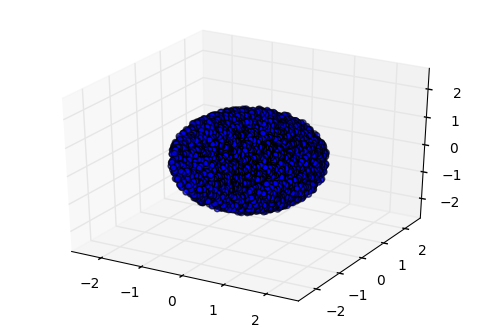

In [4]:
show_mcplot(monte_carlo_plot(o3_s))



Most chemistry students know on the surface that s orbitals are mostly spherelike and in one phase, but that is deceptive. And the beauty of the MC model, is that is clearly visible if we decrease the number of points. Suppose we only use 1000 points instead of 10000:

Calculating Orbital Points..........Done
Generating Plot:


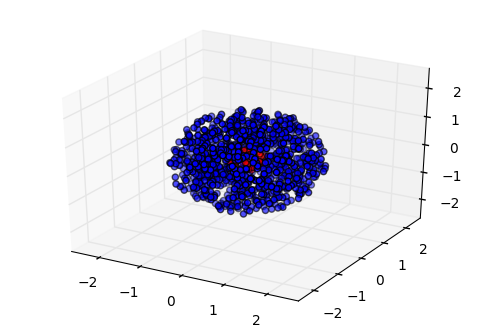

In [5]:
show_mcplot(monte_carlo_plot(o3_s,N=1000))

While it might take a few runs to notice, there are clearly red ( negative amplitude) points in this orbital diagram, hidden inside the surrounding of the 3s orbital! An extremely subtle fact about the 2s and higher orbitals that is not usually talked about, is that they have at least one spherical <b><em>nodal surface </em></b>, or a surface between regions of nonzero amplitude where the wavefunction (and therefore the electron density/probability density) is zero. Regions or points where this occurs are called <b><em> nodes </em></b> and the existence of nodal planes is critical to much of chemistry.  While even the MC model doesn't show it accurately here, the 3s orbital actually has 2 nodal surfaces. 

In [6]:
def o3d_z2(x,y,z, M=1):
    r = np.sqrt(x**2+y**2+z**2)
    return np.sqrt((M**7)/(18*np.pi)) *r**2*np.exp(-M*r)*(3*z**2/r**2-1)#*r*np.sqrt(x**2+y**2)

Calculating Orbital Points..........Done
Generating Plot:


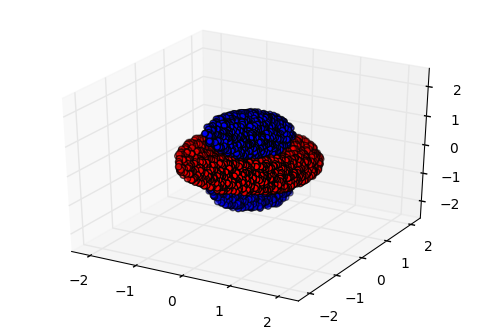

In [7]:
show_mcplot(monte_carlo_plot(o3d_z2, N=8000,level =0.085, box = 5, M=5))

## Size Difference Orbitals 

The same orbital shape is different sizes in the periodic table: e.g Take a Oxygen 2pz orbital (Z = 8, n = 2), M = 4, a Phosphorous 3pz orbital (Z = 15, n =3), M = 5, and a Cobalt 3dz^2 orbital ( Z = 27, n =3), M = 9


In [8]:
def o3p_z(x,y,z,M=5):
    r = np.sqrt(x**2+y**2+z**2)
    return -np.sqrt(24*M**5/np.pi)*z*(1-(M*r)/2)*np.exp(-M*r)

In [9]:
cobalt = monte_carlo_plot(o3d_z2, N=2000,level =0.1, box = 3, M=9)
phosphorous = monte_carlo_plot(o3p_z, N=2000,level=0.1, box=5, M=5)
oxygen = monte_carlo_plot(o2p_z,N=2000,level=0.1,box=6,M=4)




Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done


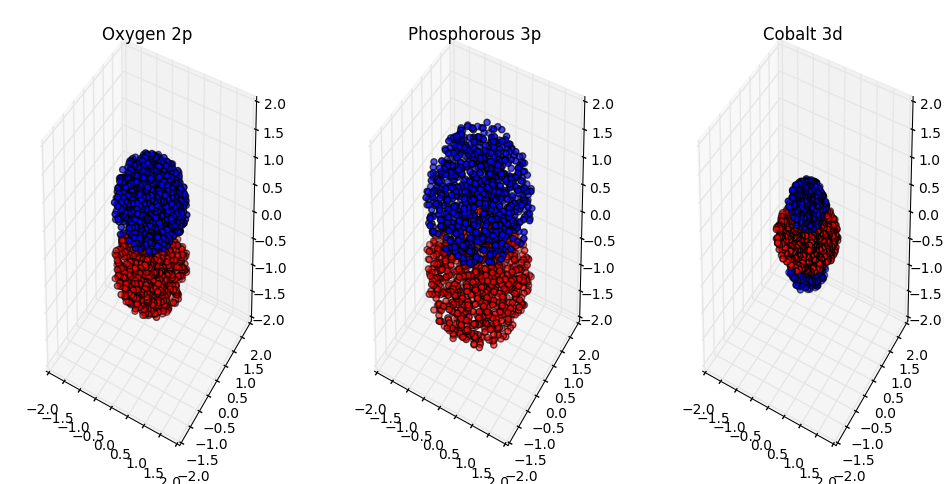

In [12]:
def plot_multiple(data, titles, r =1,c =3, lim = 2, figw=12,figh=6):
    fig = plt.figure(figsize=(figw,figh))
    plots = []
    for i in range (r):
        for j in range (c): 
            ax = fig.add_subplot(r*100+c*10+c*i+j+1, projection='3d')
            plots.append(ax)
    for d,p,t in zip(data,plots,titles):
        x,y,z,c = zip(*d)
        p.scatter(x,y,z,c=c)
        p.set_title(t)
        p.set_zlim(-lim,lim)
        p.set_ylim(-lim,lim)
        p.set_xlim(-lim,lim)
    plt.subplots_adjust(wspace=0.2)
    plt.show()
    
plot_multiple([oxygen,phosphorous,cobalt], ['Oxygen 2p','Phosphorous 3p','Cobalt 3d'])

As can be seen above, the 3p orbital is bigger than the 2p orbital. This is consistent with standard Bohr model chemistry, a higher energy level/ wider orbit. But note in particular the 3dz^2 orbital. It is significantly smaller than the 3pz orbital - so small infact that it is even smaller than the 2pz orbital. It is true, cobalt has a much stronger nuclear force than phosphorous, and so all orbitals are contracted, however, the (empty) 3d orbitals of phosphorous also follow that pattern as shown below. Moreover the size of the 3dz^2 orbitals and the similarity in size with the 2p and 2s orbitals form the backbone of most of inorganic chemistry

Calculating Orbital Points..........Done
Calculating Orbital Points..........Done


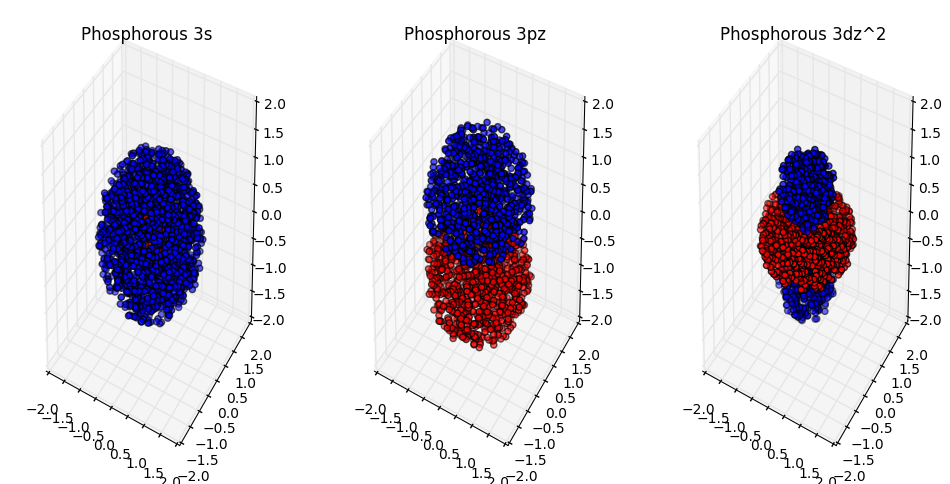

In [14]:
phosphorous_s = monte_carlo_plot(o3_s, N=2000,level =0.1, box = 3, M=5)
phosphorous_d = monte_carlo_plot(o3d_z2,N=2000,level=0.1,box=3,M=5)
plot_multiple(data = [phosphorous_s,phosphorous,phosphorous_d],titles = ['Phosphorous 3s','Phosphorous 3pz','Phosphorous 3dz^2'])

### Gerade/Ungerade Symmetry
Note that the s orbital has <b><em>gerade</em></b> symmetry - there is a point (in this case the point (0,0,0)/the nucleus) that exists as a point of inversion. Invert the orbital around that point at you would be matching (+) to (+) and (-) to (-). That is to say if we took the s orbital and invert it (flipping every point (x,y,z) to (-x,-y,-z)), the original s orbital would be perfectly in phase with its counterpart. The d orbital likewise has <b><em>gerade</em></b> symmetry

The p orbital on the other hand has <b><em> ungerade</em></b> symmetry - there is a point that acts as a point of inversion when paired with a reversal in phase. If we took a p orbital and inverted it across (0,0,0), the resultant p orbital would be perfectly out of phase with the original p orbital. 

Messing around with orbitals can demonstrate that when the quantum number l (of $\Psi_{nlm}$) is even (s,d,g etc. orbitals), the orbital posesses gerade symmetry, whereas when the quantum number l is odd (p,f,h etc. orbitals), the orbital possesses ungerade symmetry

Note that this symmetry is irrespective of the subclass/direction of orbital ($p_x,p_y,p_z$ are all <em> ungerade </em>) and ($d_{xy},d_{yz},d_{xz},d_{x^2-y^2},d_{z^2}$ are all <em> gerade </em>) 

In [15]:
def o3p_x(x,y,z,M=5):
    r = np.sqrt(x**2+y**2+z**2)
    return -np.sqrt(24*M**5/np.pi)*x*(1-(M*r)/2)*np.exp(-M*r)
def o3p_y(x,y,z,M=5):
    r = np.sqrt(x**2+y**2+z**2)
    return -np.sqrt(24*M**5/np.pi)*y*(1-(M*r)/2)*np.exp(-M*r)

### Hybridization

Hybridization was used to explain the experimental observation that the bonds of methane ($\text{CH}_4$) were all equivalently strong, and in fact indistinguishable. If the four bonds of methane were based on the four atomic orbitals of carbon (2s, 2px, 2py, 2pz), you would expect 3 bonds of a certain strength (p) and 1 bond of a different strength (s). Since this is not the case, Linus Pauling theorized that the actual orbitals formed are 4 $sp^3$ orbitals, a hybrid orbital consisting of 1/4 s and 3/4s p. 

A possible wavefunction of an sp3 orbital could be: 

$$\Psi = \frac{1}{2}\Psi_{3s} + \frac{\sqrt{3}}{2}\Psi_{3p_z}$$

In [16]:
phosphorous_px = monte_carlo_plot(o3p_x, N=2000,level =0.1, box = 3, M=5)
phosphorous_py = monte_carlo_plot(o3p_y, N=2000,level=0.1, box=5, M=5)


def o3sp3(x,y,z,M=5, theta = 0, phi = 0):
    mz = 1 if theta <90 else -1
    cz = np.sqrt(np.abs((90-theta)/90))
    mx = 1 if np.cos(np.deg2rad(phi)) >=0 else -1
    my = 1 if np.sin(np.deg2rad(phi)) >=0 else -1
    phi =  np.abs(np.arcsin(np.sin(np.deg2rad(phi)))*180/np.pi)
    cy = np.sqrt(phi/90)*np.sqrt((90-np.abs(90-theta))/90)
    cx = np.sqrt((90-phi)/90)*np.sqrt((90-np.abs(90-theta))/90)
    return 1/2*(o3_s(x,y,z,M) + np.sqrt(3)*(mz*cz*o3p_z(x,y,z,M) + mx*cx*o3p_x(x,y,z,M)+my*cy*o3p_y(x,y,z,M)))
phosphorous_sp3z = monte_carlo_plot(o3sp3,N=2000,level=0.2,box=3,M=5)

Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done


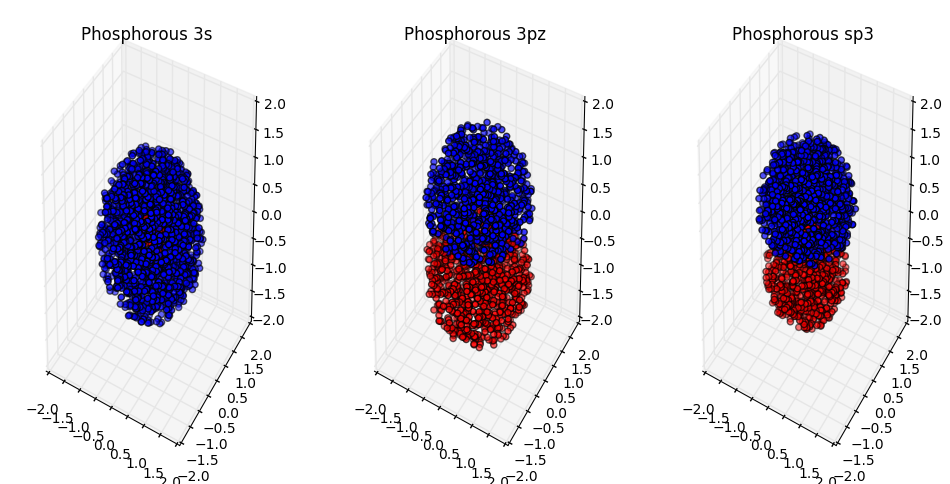

In [17]:
plot_multiple([phosphorous_s,phosphorous,phosphorous_sp3z],['Phosphorous 3s','Phosphorous 3pz', 'Phosphorous sp3'],r=1,c=3)

The difference between the hybrid $sp^3$ orbital and the simple $p_z$ function is hard to see - it is certainly much subtler than the often exaggerated depictions of the $sp^3$ orbitals found in chemistry textbooks. However, it is clear that there are many more points in the (+) region than the (-) region

In [18]:
ppz = sum([1 for p in phosphorous if p[-1]=='b']) #count the number of points in our pz plot that are blue
psp3 = sum([1 for p in phosphorous_sp3z if p[-1]=='b']) #count the number of points in our sp3 plot that are blue
#The difference between the blue and red plots are given due to Count(RED) = Total_Points - Count(Blue)
#Total_Points = 2000
#Count(Blue) - Count(Red) = 2 *Count(Blue)-2000
print('There are {} more points in the (+) region than the (-) region in the 3pz orbital'.format(2*ppz-2000))
print('There are {} more points in the (+) region than the (-) region in the sp3 orbital'.format(2*psp3-2000))

There are -66 more points in the (+) region than the (-) region in the 3pz orbital
There are 450 more points in the (+) region than the (-) region in the sp3 orbital


As can be seen above, we counted all the points that were blue(+) and red(-) in both the pz and sp3 orbitals, and while the pz orbital sometimes has more red points and sometimes more blue (this is the nature of random sampling/MC methods), it is always small and negligible when compared to the difference in the sp3 orbital, which always has more (+) area than negative.

In [19]:
def o2p_z(x,y,z, M=3):    return np.sqrt((M**5)/np.pi) *z*np.exp(-M*np.sqrt(x**2+y**2+z**2))
def o2p_y(x,y,z, M=3):    return np.sqrt((M**5)/np.pi) *y*np.exp(-M*np.sqrt(x**2+y**2+z**2))
def o2p_x(x,y,z, M=3):    return np.sqrt((M**5)/np.pi) *x*np.exp(-M*np.sqrt(x**2+y**2+z**2))
def o2s(x,y,z,M=3):       return -np.sqrt((M**3)/np.pi) *(1-M*np.sqrt(x**2+y**2+z**2))*np.exp(-M*np.sqrt(x**2+y**2+z**2))
def o1s(x,y,z,M=1):       return np.sqrt((M**3)/np.pi)*np.exp(-M*np.sqrt(x**2+y**2+z**2))
def o2sp3(x,y,z,M=3, theta = 0, phi = 0):
    mz = 1 if theta <90 else -1
    cz = np.sqrt(np.abs((90-theta)/90))
    mx = 1 if np.cos(np.deg2rad(phi)) >=0 else -1
    my = 1 if np.sin(np.deg2rad(phi)) >=0 else -1
    phi =  np.abs(np.arcsin(np.sin(np.deg2rad(phi)))*180/np.pi)
    cy = np.sqrt(phi/90)*np.sqrt((90-np.abs(90-theta))/90)
    cx = np.sqrt((90-phi)/90)*np.sqrt((90-np.abs(90-theta))/90)
    return 1/2*(o2s(x,y,z,M) + np.sqrt(3)*(mz*cz*o2p_z(x,y,z,M) + mx*cx*o2p_x(x,y,z,M)+my*cy*o2p_y(x,y,z,M)))

In [20]:
H_positions = [(0,0),(109.5,30), (109.5,150),(109.5,270)]
r = 2.05                                                   # Empirical C-H distance is 1.09 Angstrom, or 2.05 Bohr radii
orbitals = [] 
for h in H_positions:
    methane_C  = monte_carlo_plot(o2sp3, N=1000,level =0.1, box = 3, M=3, theta = h[0],phi = h[1])
    orbitals = orbitals + methane_C
    h_s = monte_carlo_plot(o1s,N=1000,level=0.1,box=2,M=1)
    h_1delta = (r*np.sin(np.deg2rad(h[0]))*np.cos(np.deg2rad(h[1])),r*np.sin(np.deg2rad(h[0]))*np.sin(np.deg2rad(h[1])),r*np.cos(np.deg2rad(h[0])))
    for point in h_s:
        point[-1] = 'c' if point[-1]=='b' else 'y'
        for i in range(3):
            point[i] = point[i] +h_1delta[i]
    orbitals = orbitals + h_s
orbitals = sorted(orbitals,key =  lambda x: -x[0]-x[1])


Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done
Calculating Orbital Points..........Done


As can be seen below, there is a ton of overlap between the carbon sp3 orbitals (blue/red) and the hydrogen 1s orbitals (cyan) and the diagram of $CH_4$ below is more or less the exact model of 

Generating Plot:


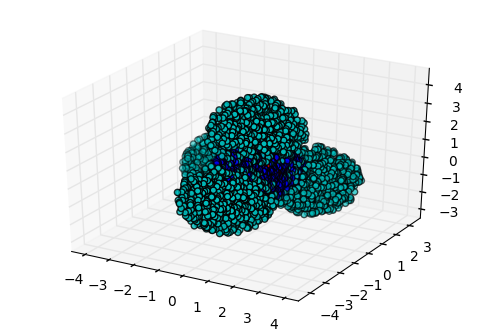

In [21]:
show_mcplot(orbitals)